# Exploratory Data analysis of Employees dataset



In [1]:
#Loading the libraries
import pandas as pd
import numpy as np

# Read dataset using pandas
df = pd.read_csv(r"C:\Users\excel\Downloads\employees.csv")
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [2]:
df.tail()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development
999,Albert,Male,5/15/2012,6:24 PM,129949,10.169,True,Sales


In [3]:
df.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [4]:
df.shape

(1000, 8)

In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
# convert "Start Date" column to datetime data type
df['Start Date'] = pd.to_datetime(df['Start Date'], format='mixed')

In [7]:
df.dtypes

First Name                   object
Gender                       object
Start Date           datetime64[ns]
Last Login Time              object
Salary                        int64
Bonus %                     float64
Senior Management            object
Team                         object
dtype: object

In [8]:
columns = {'First Name':'First_Name', 
           'Start Date':'Start_date', 
           'Last Login Time':'Last_Login_Time', 
            'Bonus %':'Bonus_perct', 
           'Senior Management':'Senior_Management'}
df.rename(columns = columns, inplace=True)

In [9]:
df.columns

Index(['First_Name', 'Gender', 'Start_date', 'Last_Login_Time', 'Salary',
       'Bonus_perct', 'Senior_Management', 'Team'],
      dtype='object')

In [10]:
df.nunique()

First_Name           200
Gender                 2
Start_date           972
Last_Login_Time      720
Salary               995
Bonus_perct          971
Senior_Management      2
Team                  10
dtype: int64

# Handling Missing Values:
    
isnull()
notnull()
dropna()
fillna()
bfill()
ffill()
replace()
interpolate()

In [11]:
df.isnull().sum()

First_Name            67
Gender               145
Start_date             0
Last_Login_Time        0
Salary                 0
Bonus_perct            0
Senior_Management     67
Team                  43
dtype: int64

In [12]:
df["Gender"].fillna("No Gender", inplace = True)

In [13]:
df['Gender'].isnull().sum()

0

In [16]:
df['Senior_Management'].mode()[0]

True

In [18]:
mode = df['Senior_Management'].mode()[0]
mode

True

In [19]:
df['Senior_Management'] = df['Senior_Management'].replace(np.nan, mode)

In [20]:
df['Senior_Management'].isnull().sum()

0

In [21]:
df.isnull().sum()

First_Name           67
Gender                0
Start_date            0
Last_Login_Time       0
Salary                0
Bonus_perct           0
Senior_Management     0
Team                 43
dtype: int64

In [22]:
df['Team'].value_counts()

Team
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: count, dtype: int64

In [23]:
df = df.dropna(axis = 0, how ='any')

In [24]:
df.isnull().sum()

First_Name           0
Gender               0
Start_date           0
Last_Login_Time      0
Salary               0
Bonus_perct          0
Senior_Management    0
Team                 0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First_Name         899 non-null    object        
 1   Gender             899 non-null    object        
 2   Start_date         899 non-null    datetime64[ns]
 3   Last_Login_Time    899 non-null    object        
 4   Salary             899 non-null    int64         
 5   Bonus_perct        899 non-null    float64       
 6   Senior_Management  899 non-null    bool          
 7   Team               899 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 57.1+ KB


In [26]:
df = df.reset_index()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              899 non-null    int64         
 1   First_Name         899 non-null    object        
 2   Gender             899 non-null    object        
 3   Start_date         899 non-null    datetime64[ns]
 4   Last_Login_Time    899 non-null    object        
 5   Salary             899 non-null    int64         
 6   Bonus_perct        899 non-null    float64       
 7   Senior_Management  899 non-null    bool          
 8   Team               899 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 57.2+ KB


# Data visualization
Data Visualization is the process of analyzing data in the form of graphs or maps, making it a lot easier to understand the trends or patterns in the data.

Matplotlib 
Python Seaborn 

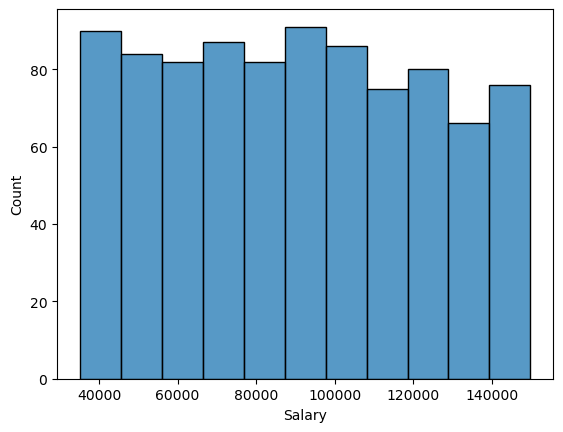

In [28]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Salary', data=df )
plt.show()

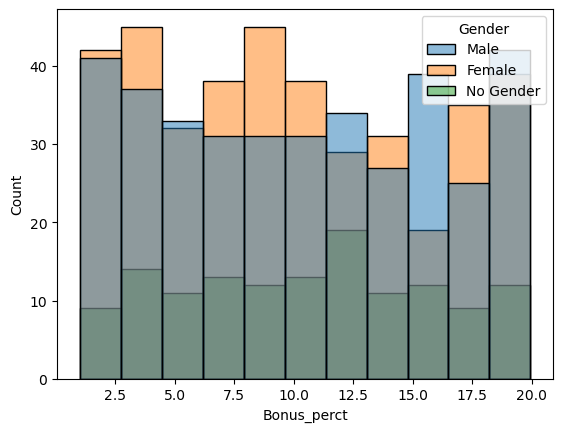

In [36]:
sns.histplot(x = 'Bonus_perct', hue = 'Gender',data = df, alpha = 0.5)
plt.show()

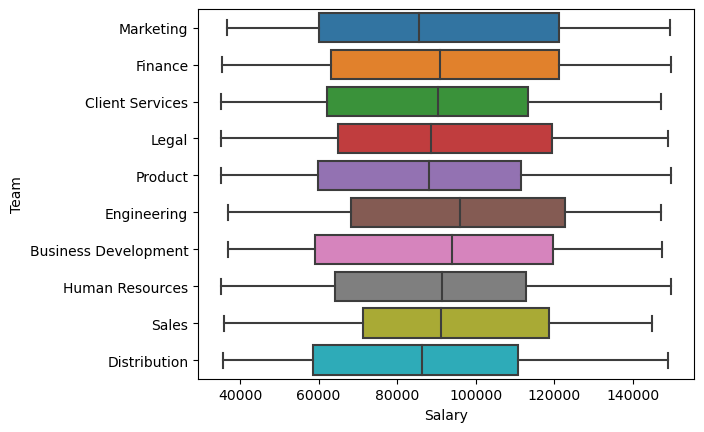

In [37]:
sns.boxplot(x="Salary", y='Team', data=df )
plt.show()

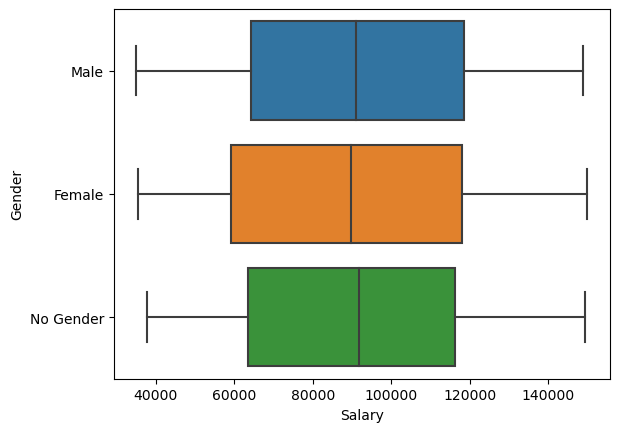

In [38]:
sns.boxplot(x="Salary", y='Gender', data=df )
plt.show()

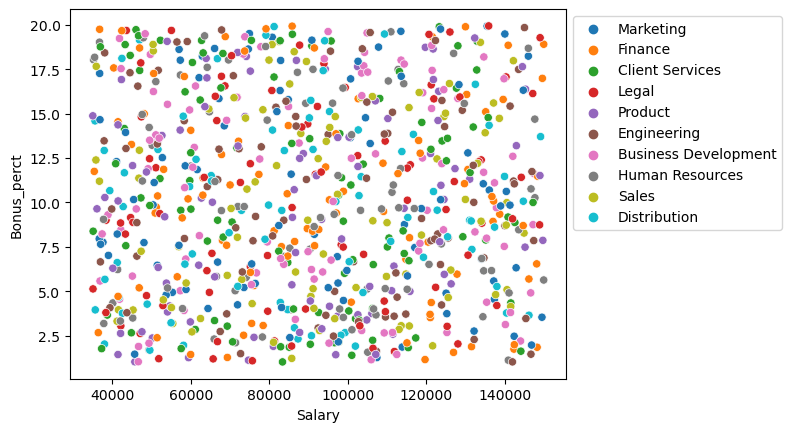

In [39]:
# Relationship of variables
sns.scatterplot(x="Salary", y='Bonus_perct', data=df, hue = 'Team')
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [40]:
df['Salary'].corr(df['Bonus_perct'])

-0.01702025486966284

C:\ProgramData\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


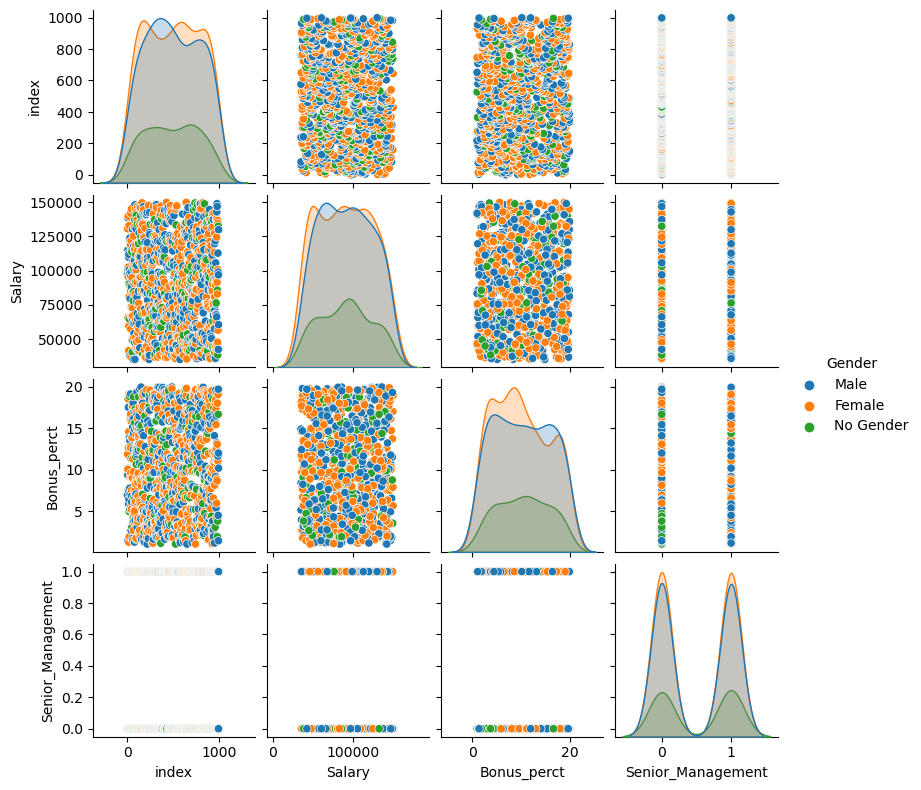

In [41]:
sns.pairplot(df, hue='Gender', height=2)

# Task: line chart on salary and startdate by team or gender.

# Handling Outliers

In [49]:
# Load the dataset
df = sns.load_dataset("iris")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [48]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

<Axes: xlabel='sepal_width'>

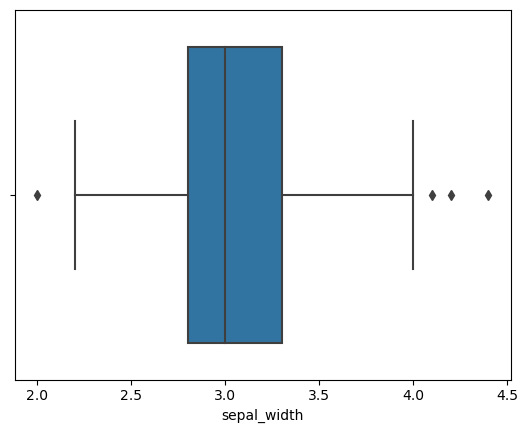

In [47]:
sns.boxplot(x=df['sepal_width'], data=df)

In [39]:
df.shape

(150, 5)

In [53]:
# IQR
Q1 = np.percentile(df['sepal_width'], 25, method = 'midpoint')
Q3 = np.percentile(df['sepal_width'], 75, method = 'midpoint')
# print(Q1,Q3)
IQR = Q3 - Q1
print("Old Shape: ", df.shape)
Upper = Q3+1.5*IQR
# print(Upper)
lower =  Q1-1.5*IQR  
# print(lower)
[lower,Upper]

Old Shape:  (150, 5)


[2.05, 4.05]

In [54]:
# Upper bound
max_Upper_value = np.where(df['sepal_width'] >= Upper)
print(max_Upper_value) 

(array([15, 32, 33], dtype=int64),)


In [55]:
# Lower bound
min_Lower_value = np.where(df['sepal_width'] <= lower)
print(min_Lower_value)

(array([60], dtype=int64),)


In [57]:
# df.head(35)

In [59]:
df.drop(min_Lower_value[0], inplace = True)

In [60]:
df.drop(max_Upper_value[0], inplace = True)

In [61]:
print("New Shape: ", df.shape)

New Shape:  (146, 5)


<Axes: xlabel='sepal_width'>

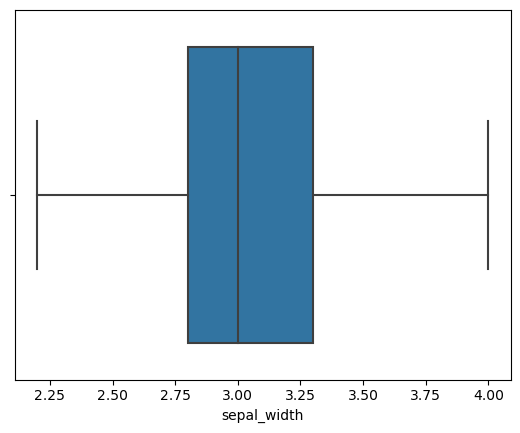

In [62]:
sns.boxplot(x='sepal_width', data=df)

<Axes: xlabel='sepal_length'>

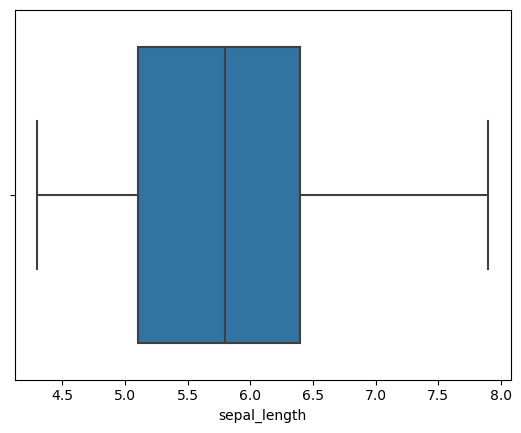

In [57]:
sns.boxplot(x='sepal_length', data=df)

<Axes: xlabel='petal_length'>

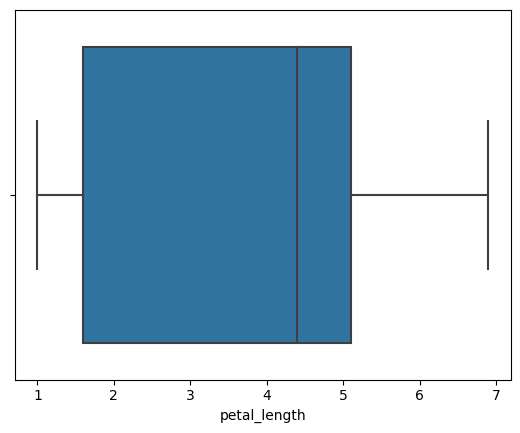

In [58]:
sns.boxplot(x='petal_length', data=df)

<Axes: xlabel='petal_width'>

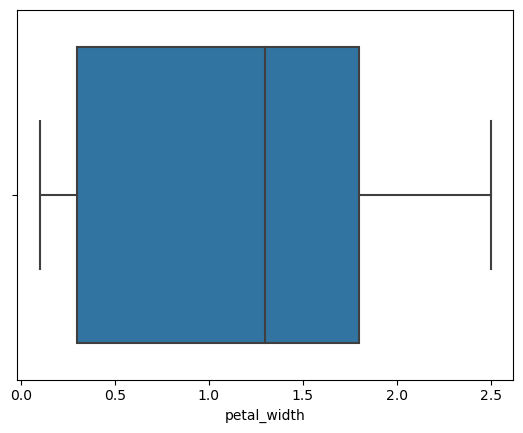

In [59]:
sns.boxplot(x='petal_width', data=df)

In [64]:
sample_df = pd.read_excel(r"C:\Users\excel\DATA Science\Datasets\Sample - Superstore.xls")
sample_df.shape

(9994, 21)

In [66]:
sample_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [67]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
